Shape: (397884, 9)
            InvoiceNo StockCode                         Description  \
count   397884.000000    397884                              397884   
unique            NaN      3665                                3877   
top               NaN    85123A  WHITE HANGING HEART T-LIGHT HOLDER   
freq              NaN      2035                                2028   
mean    560616.934451       NaN                                 NaN   
min     536365.000000       NaN                                 NaN   
25%     549234.000000       NaN                                 NaN   
50%     561893.000000       NaN                                 NaN   
75%     572090.000000       NaN                                 NaN   
max     581587.000000       NaN                                 NaN   
std      13106.117773       NaN                                 NaN   

             Quantity                    InvoiceDate      UnitPrice  \
count   397884.000000                         397884  397

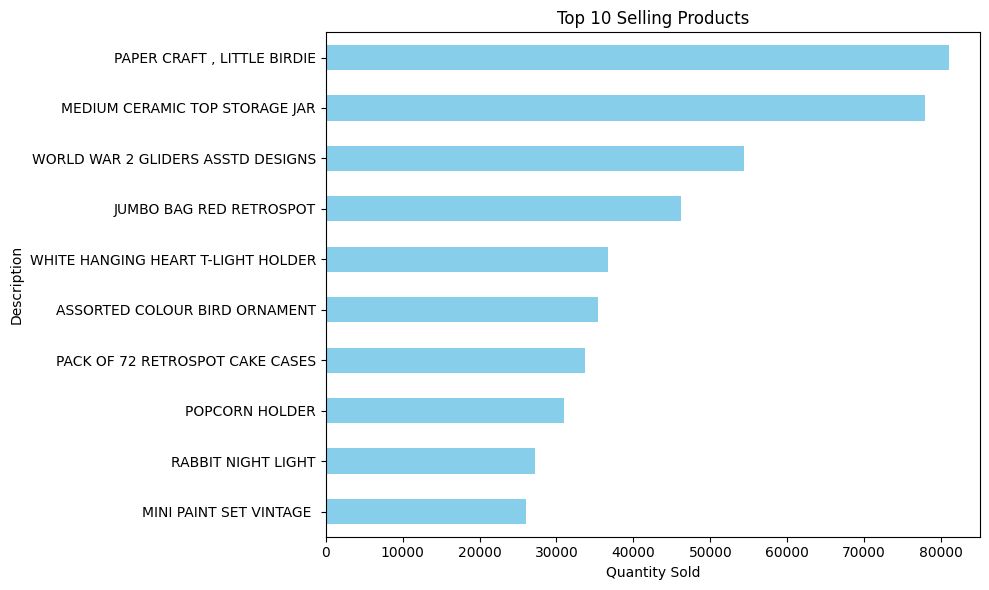

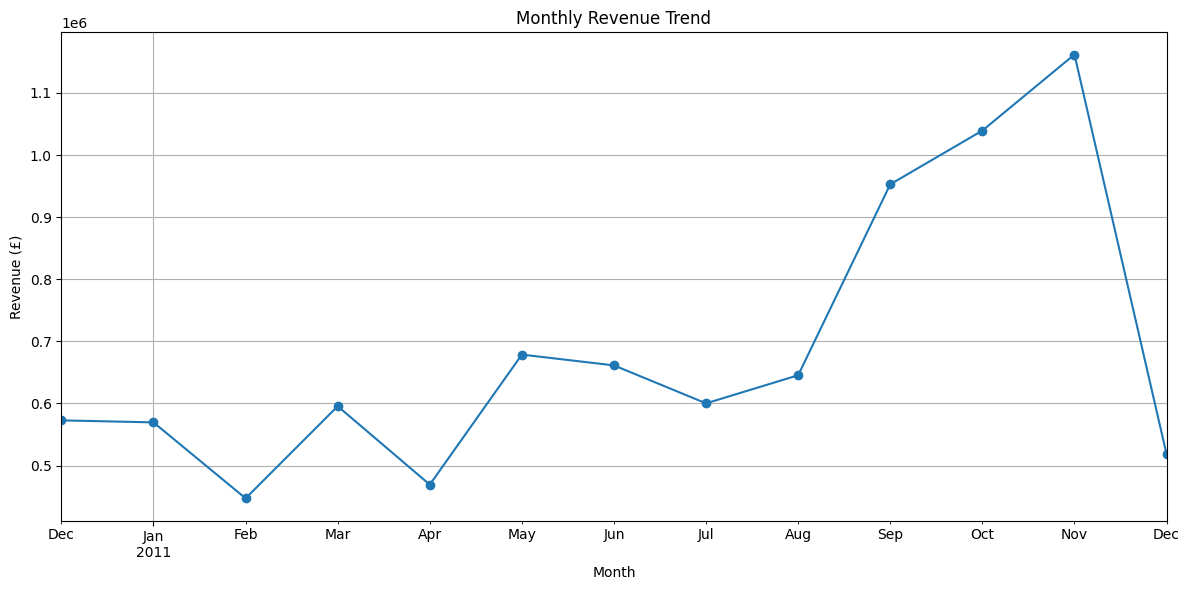

C:\Users\HARSH\AppData\Local\Temp\ipykernel_30544\1897675892.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=revenue_by_country.values, y=revenue_by_country.index, palette="Blues_r")


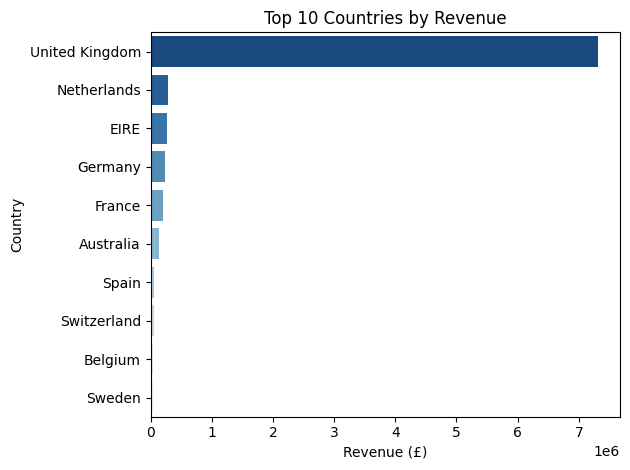

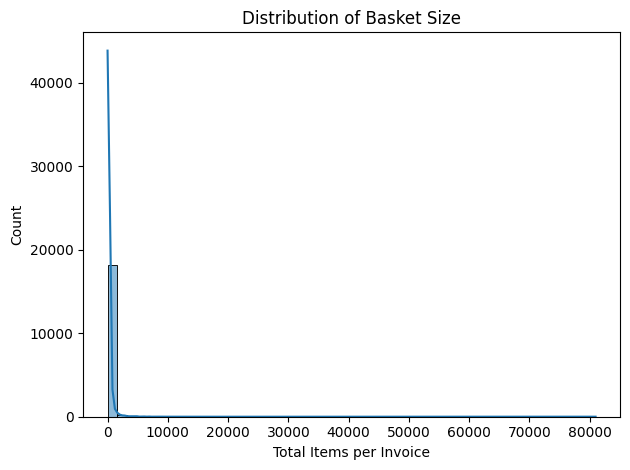

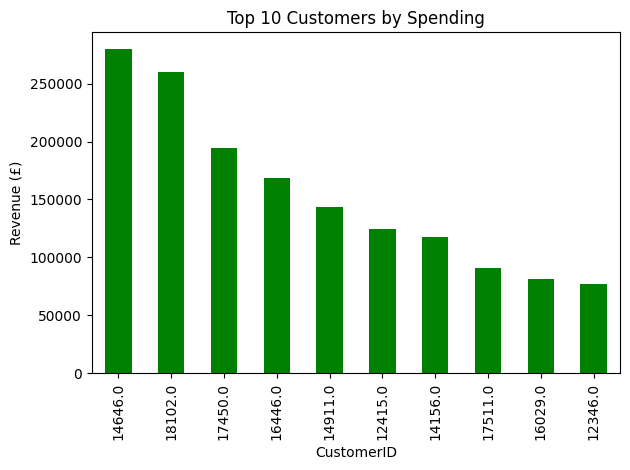

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned data
df = pd.read_csv(r"C:\Users\HARSH\OneDrive\Desktop\Retail_Internship_Project\data\cleaned\retail_cleaned.csv", parse_dates=["InvoiceDate"])

# Basic overview
print("Shape:", df.shape)
print(df.describe(include='all'))

# Total revenue
total_revenue = df["TotalPrice"].sum()
print("Total Revenue: £{:.2f}".format(total_revenue))

# Top 10 selling products
top_products = df.groupby("Description")["Quantity"].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='barh', figsize=(10, 6), color='skyblue')
plt.title("Top 10 Selling Products")
plt.xlabel("Quantity Sold")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Monthly revenue trend
df["InvoiceMonth"] = df["InvoiceDate"].dt.to_period("M")
monthly_revenue = df.groupby("InvoiceMonth")["TotalPrice"].sum()

monthly_revenue.plot(kind='line', marker='o', figsize=(12, 6))
plt.title("Monthly Revenue Trend")
plt.ylabel("Revenue (£)")
plt.xlabel("Month")
plt.grid(True)
plt.tight_layout()
plt.show()

# Revenue by country
revenue_by_country = df.groupby("Country")["TotalPrice"].sum().sort_values(ascending=False).head(10)
sns.barplot(x=revenue_by_country.values, y=revenue_by_country.index, palette="Blues_r")
plt.title("Top 10 Countries by Revenue")
plt.xlabel("Revenue (£)")
plt.tight_layout()
plt.show()

# Basket size (products per invoice)
basket_size = df.groupby("InvoiceNo")["Quantity"].sum()
sns.histplot(basket_size, bins=50, kde=True)
plt.title("Distribution of Basket Size")
plt.xlabel("Total Items per Invoice")
plt.tight_layout()
plt.show()

# Most active customers
top_customers = df.groupby("CustomerID")["TotalPrice"].sum().sort_values(ascending=False).head(10)
top_customers.plot(kind="bar", color="green")
plt.title("Top 10 Customers by Spending")
plt.xlabel("CustomerID")
plt.ylabel("Revenue (£)")
plt.tight_layout()
plt.show()
